In [26]:
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
class AddGaussianNoise:
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

In [35]:
def plot_histogram(img,title, bins = 100):
    y,x = torch.histogram(img,bins=bins)
    y = y.numpy()
    x = x.numpy()
    print(x)
    plt.hist(x[1:],y)
    plt.title(title)

In [19]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                AddGaussianNoise(mean=0.0, std=0.1),
                                transforms.Grayscale(num_output_channels=1)])

In [20]:
test_image = Image.open('testImage.jpg')
test_image = transform(test_image)
test_image.shape

torch.Size([1, 177, 285])

[-1.165329   -1.1416507  -1.1179724  -1.094294   -1.0706156  -1.0469373
 -1.023259   -0.99958074 -0.9759024  -0.9522241  -0.9285457  -0.9048674
 -0.8811891  -0.85751075 -0.83383244 -0.8101541  -0.7864758  -0.7627975
 -0.7391191  -0.7154408  -0.69176245 -0.66808414 -0.64440584 -0.62072754
 -0.5970492  -0.5733709  -0.5496925  -0.5260142  -0.5023359  -0.47865754
 -0.45497924 -0.4313009  -0.40762258 -0.38394424 -0.3602659  -0.3365876
 -0.31290928 -0.28923094 -0.26555264 -0.2418743  -0.21819597 -0.19451764
 -0.17083932 -0.147161   -0.12348267 -0.09980435 -0.07612602 -0.05244771
 -0.02876937 -0.00509105  0.01858728  0.0422656   0.06594393  0.08962225
  0.11330058  0.1369789   0.16065717  0.1843355   0.20801382  0.23169214
  0.25537047  0.2790488   0.3027271   0.32640544  0.3500837   0.37376204
  0.39744037  0.42111868  0.444797    0.46847534  0.49215364  0.51583195
  0.53951037  0.5631887   0.58686703  0.61054534  0.6342237   0.657902
  0.6815803   0.7052586   0.7289369   0.7526152   0.77629

ValueError: `bins` must increase monotonically, when an array

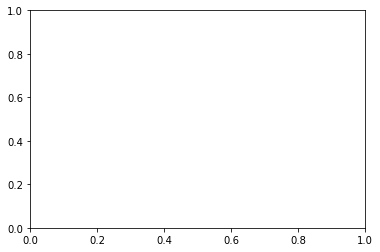

In [36]:
plot_histogram(test_image, 'Histogram of test image')